# Intro to NLP and pandas
# - Ben Cohen
## Kensho

# Outline
* ## What is NLP
* ## Goal?
* ## Using Pandas to explore our data
* ## Training a classifier
* ## Evaluating our classifier
* ## Improvement


# Imports

In [1]:
%load_ext autoreload
%autoreload 2
from IPython.core.display import display, HTML
from IPython.display import Image

display(HTML("<style>.container { width:90% !important; }</style>"))

In [2]:
import glob
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import pandas as pd

# What is our data?

In [3]:
!ls

is-spam           not-spam          talk.ipynb
non_spam_test.txt spam_test.txt


In [4]:
!ls -la is-spam

total 6232
drwxr-xr-x@ 503 ben  staff   17102 Feb  5  2015 .
drwxr-xr-x    9 ben  staff     306 Sep 17 13:26 ..
-rwxr-xr-x@   1 ben  staff   23444 Feb  5  2015 0000.7b1b73cf36cf9dbc3d64e3f2ee2b91f1
-rwxr-xr-x@   1 ben  staff    3997 Feb  5  2015 0001.bfc8d64d12b325ff385cca8d07b84288
-rwxr-xr-x@   1 ben  staff     874 Feb  5  2015 0002.24b47bb3ce90708ae29d0aec1da08610
-rwxr-xr-x@   1 ben  staff     730 Feb  5  2015 0003.4b3d943b8df71af248d12f8b2e7a224a
-rwxr-xr-x@   1 ben  staff    3070 Feb  5  2015 0004.1874ab60c71f0b31b580f313a3f6e777
-rwxr-xr-x@   1 ben  staff     752 Feb  5  2015 0005.1f42bb885de0ef7fc5cd09d34dc2ba54
-rwxr-xr-x@   1 ben  staff    2491 Feb  5  2015 0006.7a32642f8c22bbeb85d6c3b5f3890a2c
-rwxr-xr-x@   1 ben  staff     756 Feb  5  2015 0007.859c901719011d56f8b652ea071c1f8b
-rwxr-xr-x@   1 ben  staff   30292 Feb  5  2015 0008.9562918b57e044abfbce260cc875acde
-rwxr-xr-x@   1 ben  staff    2971 Feb  5  2015 0009.c05e264fbf18783099b53dbc9a9aacda
-rwxr-xr-x@   1 ben  staff  

In [5]:
!cat is-spam/0001.bfc8d64d12b325ff385cca8d07b84288

In [6]:
!cat not-spam/00001.7c53336b37003a9286aba55d2945844c

In [7]:
spam_articles = glob.glob('is-spam/*')
non_spam_articles = glob.glob('not-spam/*')
print len(spam_articles), len(non_spam_articles)

501 887


# Lets start to look at our data

In [8]:
from nltk import word_tokenize, sent_tokenize

In [9]:
def tokenize_article(filename):
    text = open(filename).read().decode('utf-8', 'ignore')
    words = word_tokenize(text)
    sentences = sent_tokenize(text)
    return words, sentences

In [10]:
words, sents = tokenize_article(spam_articles[1])

In [11]:
words[0]

u'Life'

In [12]:
sents[0]

u'Life Insurance - Why Pay More?<!DOCTYPE HTML PUBLIC "-//W3C//DTD HTML 4.0 Transitional//EN">\r\n<HTML><HEAD>\r\n<META content=3D"text/html; charset=3Dwindows-1252" http-equiv=3DContent-T=\r\nype>\r\n<META content=3D"MSHTML 5.00.2314.1000" name=3DGENERATOR></HEAD>\r\n<BODY><!-- Inserted by Calypso -->\r\n<TABLE border=3D0 cellPadding=3D0 cellSpacing=3D2 id=3D_CalyPrintHeader_ r=\r\nules=3Dnone \r\nstyle=3D"COLOR: black; DISPLAY: none" width=3D"100%">\r\n  <TBODY>\r\n  <TR>\r\n    <TD colSpan=3D3>\r\n      <HR color=3Dblack noShade SIZE=3D1>\r\n    </TD></TR></TD></TR>\r\n  <TR>\r\n    <TD colSpan=3D3>\r\n      <HR color=3Dblack noShade SIZE=3D1>\r\n    </TD></TR></TBODY></TABLE><!-- End Calypso --><!-- Inserted by Calypso=\r\n --><FONT \r\ncolor=3D#000000 face=3DVERDANA,ARIAL,HELVETICA size=3D-2><BR></FONT></TD><=\r\n/TR></TABLE><!-- End Calypso --><FONT color=3D#ff0000 \r\nface=3D"Copperplate Gothic Bold" size=3D5 PTSIZE=3D"10">\r\n<CENTER>Save up to 70% on Life Insurance.</CENTER></

In [13]:
print len(sents)

11


In [14]:
def make_feature_vector(article_filename):
    words, sents = tokenize_article(article_filename)
    num_sentences = len(sents)
    buy_count = words.count('buy')
    return [num_sentences, buy_count]

In [15]:
print make_feature_vector(spam_articles[68])

[3, 2]


In [16]:
spam_feature_vectors = []
for article in spam_articles:
    features = make_feature_vector(article)
    features.insert(0, article)
    spam_feature_vectors.append(features)


In [17]:
spam_df = pd.DataFrame(spam_feature_vectors)
spam_df.columns = ['article_name', 'num_sentences', 'buy_count']

In [18]:
spam_df

,article_name,num_sentences,buy_count
0,is-spam/0000.7b1b73cf36cf9dbc3d64e3f2ee2b91f1,1,0
1,is-spam/0001.bfc8d64d12b325ff385cca8d07b84288,11,0
2,is-spam/0002.24b47bb3ce90708ae29d0aec1da08610,5,0
3,is-spam/0003.4b3d943b8df71af248d12f8b2e7a224a,4,0
4,is-spam/0004.1874ab60c71f0b31b580f313a3f6e777,44,0
5,is-spam/0005.1f42bb885de0ef7fc5cd09d34dc2ba54,4,0
6,is-spam/0006.7a32642f8c22bbeb85d6c3b5f3890a2c,28,0
7,is-spam/0007.859c901719011d56f8b652ea071c1f8b,9,0
8,is-spam/0008.9562918b57e044abfbce260cc875acde,7,0
9,is-spam/0009.c05e264fbf18783099b53dbc9a9aacda,41,0


In [19]:
spam_df.describe()

,num_sentences,buy_count
count,501.000000,501.000000
mean,15.942116,0.127745
std,30.519938,0.521199
min,1.000000,0.000000
25%,4.000000,0.000000
50%,9.000000,0.000000
75%,16.000000,0.000000
max,377.000000,5.000000


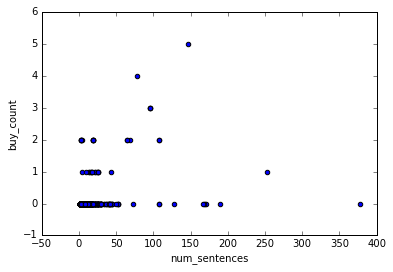

In [20]:
spam_df.plot(kind='scatter', x='num_sentences', y='buy_count')

In [21]:
non_spam_feature_vectors = []
for article in non_spam_articles:
    features = make_feature_vector(article)
    features.insert(0, article)
    non_spam_feature_vectors.append(features)

In [22]:
non_spam_df = pd.DataFrame(non_spam_feature_vectors)
non_spam_df.columns = ['article_name', 'num_sentences', 'buy_count']

In [23]:
non_spam_df.describe()

,num_sentences,buy_count
count,887.000000,887.000000
mean,15.865840,0.057497
std,35.924347,0.325839
min,1.000000,0.000000
25%,5.000000,0.000000
50%,9.000000,0.000000
75%,15.500000,0.000000
max,573.000000,6.000000


In [24]:
spam_df['spam'] = True

In [25]:
non_spam_df['spam'] = False

In [26]:
all_data = pd.concat([spam_df, non_spam_df])

In [27]:
all_data

,article_name,num_sentences,buy_count,spam
0,is-spam/0000.7b1b73cf36cf9dbc3d64e3f2ee2b91f1,1,0,True
1,is-spam/0001.bfc8d64d12b325ff385cca8d07b84288,11,0,True
2,is-spam/0002.24b47bb3ce90708ae29d0aec1da08610,5,0,True
3,is-spam/0003.4b3d943b8df71af248d12f8b2e7a224a,4,0,True
4,is-spam/0004.1874ab60c71f0b31b580f313a3f6e777,44,0,True
5,is-spam/0005.1f42bb885de0ef7fc5cd09d34dc2ba54,4,0,True
6,is-spam/0006.7a32642f8c22bbeb85d6c3b5f3890a2c,28,0,True
7,is-spam/0007.859c901719011d56f8b652ea071c1f8b,9,0,True
8,is-spam/0008.9562918b57e044abfbce260cc875acde,7,0,True
9,is-spam/0009.c05e264fbf18783099b53dbc9a9aacda,41,0,True


In [28]:
all_data.groupby('spam').describe()

buy_count  num_sentences
spam                                  
False count  887.000000     887.000000
      mean     0.057497      15.865840
      std      0.325839      35.924347
      min      0.000000       1.000000
      25%      0.000000       5.000000
      50%      0.000000       9.000000
      75%      0.000000      15.500000
      max      6.000000     573.000000
True  count  501.000000     501.000000
      mean     0.127745      15.942116
      std      0.521199      30.519938
      min      0.000000       1.000000
      25%      0.000000       4.000000
      50%      0.000000       9.000000
      75%      0.000000      16.000000
      max      5.000000     377.000000

spam
False    Axes(0.125,0.125;0.775x0.775)
True     Axes(0.125,0.125;0.775x0.775)
dtype: object

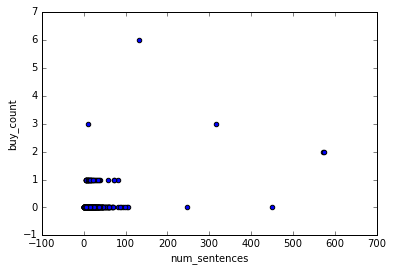

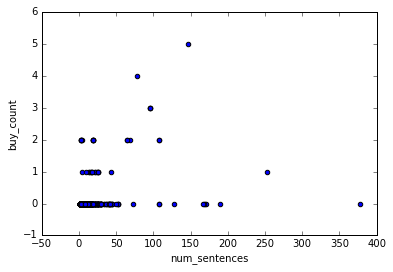

In [29]:
all_data.groupby('spam').plot(kind='scatter', x='num_sentences', y='buy_count')

spam
False    Axes(0.125,0.125;0.775x0.775)
True     Axes(0.125,0.125;0.775x0.775)
dtype: object

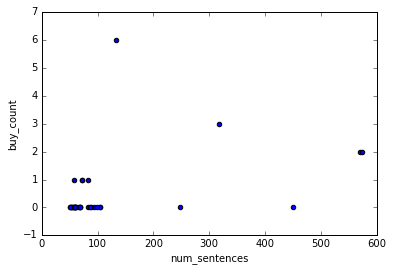

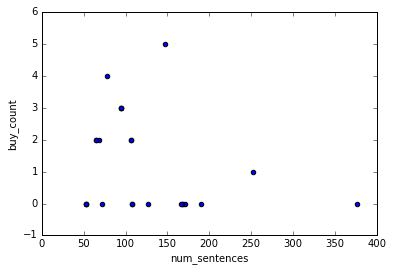

In [30]:
all_data[all_data.num_sentences >= 50].groupby('spam').plot(kind='scatter', x='num_sentences', y='buy_count')

# Back to Classification
### Dataframe to feature vectors

In [31]:
all_data.sample(frac=1)

,article_name,num_sentences,buy_count,spam
7,is-spam/0007.859c901719011d56f8b652ea071c1f8b,9,0,True
436,is-spam/0436.97d3a7bc4377152052dd717581387f36,4,0,True
406,not-spam/00407.11425a14d7fd9c3e1806fd7dc648001a,14,0,False
308,is-spam/0308.1245e8fa9e6092687b535e36b367d8fb,19,0,True
424,not-spam/00425.0ba16e840d94d629f8a3881b4e03a3ad,1,0,False
286,is-spam/0286.68b939e20e5b9fd6839471f6e9bc07ed,2,0,True
39,is-spam/0039.256602e2cb5a5b373bdd1fb631d9f452,108,0,True
287,not-spam/00288.3bf1e169fdf5504b8fa28e9998da147a,6,0,False
108,is-spam/0108.4506c2ef846b80b9a7beb90315b22701,6,0,True
393,not-spam/00394.608684acea4bef2ae7f5b89309a6046e,4,0,False


In [32]:
shuffled_data = all_data.sample(frac=1)

In [33]:
split_point = (len(shuffled_data) // 10) * 2
training_data, testing_data = shuffled_data[split_point:], shuffled_data[:split_point]
print len(training_data), len(testing_data)

1112 276


In [34]:
def get_features_from_dataframe(df, column_names):
    return zip(*[list(df[x]) for x in column_names])

In [35]:
training_set = get_features_from_dataframe(training_data, ['num_sentences', 'buy_count'])

In [36]:
training_set[:10]

[(1, 0),
 (9, 0),
 (5, 0),
 (1, 0),
 (107, 2),
 (12, 0),
 (4, 0),
 (22, 0),
 (4, 0),
 (7, 0)]

In [37]:
training_results = list(training_data.spam)

In [38]:
training_results[:10]

[True, True, True, True, True, False, False, False, False, False]

In [39]:
from sklearn.naive_bayes import GaussianNB

In [40]:
clf = GaussianNB()
clf.fit(training_set, training_results)

GaussianNB()

In [41]:
clf.predict([[10, 12]])

array([ True], dtype=bool)

In [42]:
test_set = get_features_from_dataframe(testing_data, ['num_sentences', 'buy_count'])
test_results = list(testing_data.spam)

In [43]:
predictions = clf.predict(test_set)

In [44]:
print predictions

[False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False  True False False False False False False False False False
 False False False False False False False False False False False False
 False False  True False False False False False False False False False
 False False False False False False False False False False False False
 False False False  True False False False False  True False False False
  True False False False False False False False False False False  True
 False False False False False False False False False False False False
 False False False False False False False False False False  True False
 False False False False False False False False False False False False
 False False False False False False False False False False False  True
 False False False False False False False False False False False False
 False False False  True False False False  True Fa

In [45]:
from sklearn.metrics import confusion_matrix, accuracy_score

In [46]:
print accuracy_score(predictions, test_results)

0.663043478261


X-axis is true, Y is predicted

In [47]:
print confusion_matrix(predictions, test_results, labels=[True, False])

[[  8   4]
 [ 89 175]]


# Is this good?

In [48]:
print accuracy_score([False for x in range(len(test_results))], test_results)

0.648550724638


In [49]:
print confusion_matrix([False for x in range(len(test_results))], test_results, labels=[True, False])

[[  0   0]
 [ 97 179]]


In [50]:
from sklearn.metrics import f1_score
print f1_score(test_results, [False for x in range(len(test_results))])
print f1_score(test_results, predictions)

0.0
0.146788990826


/Users/ben/anaconda/lib/python2.7/site-packages/sklearn/metrics/classification.py:1074: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


# Lets get better

In [51]:
def preprocess(text):
    return text

In [52]:
def tokenize_article(filename, preprocessor=preprocess):
    text = open(filename).read().decode('utf-8', 'ignore')
    text = preprocessor(text)
    words = word_tokenize(text)
    sentences = sent_tokenize(text)
    return words, sentences

In [53]:
def make_feature_vector(article_filename, functions, preprocessor):
    words, sents = tokenize_article(article_filename, preprocessor)
    return map(lambda x: x(words, sents), functions)


In [54]:
def num_sentences(words, sents):
    return len(sents)

def num_words(words, sents):
    return len(words)

def buy_count(words, sents):
    return words.count('buy')

feature_functions = [num_sentences, num_words, buy_count]

In [55]:
def build_dataframe(preprocessor, feature_functions):
    feature_vectors = []
    for article in spam_articles + non_spam_articles:
        features = make_feature_vector(article, feature_functions, preprocessor)
        features.insert(0, article)
        if article in spam_articles:
            features.append(True)
        else:
            features.append(False)
        feature_vectors.append(features)

    data = pd.DataFrame(feature_vectors)
    data.columns = ['article_name'] + [x.__name__ for x in feature_functions] + ['Spam']
    return data

In [56]:
build_dataframe(preprocess, feature_functions)

,article_name,num_sentences,num_words,buy_count,Spam
0,is-spam/0000.7b1b73cf36cf9dbc3d64e3f2ee2b91f1,1,1503,0,True
1,is-spam/0001.bfc8d64d12b325ff385cca8d07b84288,11,988,0,True
2,is-spam/0002.24b47bb3ce90708ae29d0aec1da08610,5,156,0,True
3,is-spam/0003.4b3d943b8df71af248d12f8b2e7a224a,4,127,0,True
4,is-spam/0004.1874ab60c71f0b31b580f313a3f6e777,44,722,0,True
5,is-spam/0005.1f42bb885de0ef7fc5cd09d34dc2ba54,4,123,0,True
6,is-spam/0006.7a32642f8c22bbeb85d6c3b5f3890a2c,28,496,0,True
7,is-spam/0007.859c901719011d56f8b652ea071c1f8b,9,133,0,True
8,is-spam/0008.9562918b57e044abfbce260cc875acde,7,4358,0,True
9,is-spam/0009.c05e264fbf18783099b53dbc9a9aacda,41,625,0,True


In [57]:
def has_html(words, sentences):
    return words.count('html')

def words_per_sent(words, sentences):
    return len(sentences)/float(len(words))

feature_functions.append(has_html)
feature_functions.append(words_per_sent)

In [58]:
data = build_dataframe(preprocess, feature_functions)

In [59]:
data.groupby('Spam').describe()

buy_count    has_html  num_sentences     num_words  \
Spam                                                               
False count  887.000000  887.000000     887.000000    887.000000   
      mean     0.057497    0.006764      15.865840    389.200676   
      std      0.325839    0.082013      35.924347    906.582159   
      min      0.000000    0.000000       1.000000     10.000000   
      25%      0.000000    0.000000       5.000000    126.500000   
      50%      0.000000    0.000000       9.000000    220.000000   
      75%      0.000000    0.000000      15.500000    376.500000   
      max      6.000000    1.000000     573.000000  16495.000000   
True  count  501.000000  501.000000     501.000000    501.000000   
      mean     0.127745    0.219561      15.942116    718.365269   
      std      0.521199    0.423906      30.519938   1110.722468   
      min      0.000000    0.000000       1.000000      2.000000   
      25%      0.000000    0.000000       4.000000    157.000000   
      50%      0.000000    0.000000       9.000000    348.000000   
      75%      0.000000    0.000000      16.000000    807.000000   
      max      5.000000    2.000000     377.000000  13031.000000   

             words_per_sent  
Spam                         
False count      887.000000  
      mean         0.044457  
      std          0.016534  
      min          0.014409  
      25%          0.034188  
      50%          0.041667  
      75%          0.051487  
      max          0.200000  
True  count      501.000000  
      mean         0.034779  
      std          0.033505  
      min          0.000601  
      25%          0.009132  
      50%          0.031496  
      75%          0.051771  
      max          0.500000

In [60]:
from sklearn.linear_model import LogisticRegression

In [61]:
def end_to_end_build_classifier(preprocessor, feature_functions):
    print 'Building DataFrame'
    df = build_dataframe(preprocessor, feature_functions)
    shuffled_data = df.sample(frac=1)
    
    print 'Splitting Data'
    split_point = (len(shuffled_data) // 10) * 2
    training_data, testing_data = shuffled_data[split_point:], shuffled_data[:split_point]
    
    func_names = [x.__name__ for x in feature_functions]

    training_set = get_features_from_dataframe(training_data, func_names)
    training_results = list(training_data.Spam)
    test_set = get_features_from_dataframe(testing_data, func_names)
    test_results = list(testing_data.Spam)
    
    for model, name in [(LogisticRegression(), 'Regression'), (GaussianNB(), 'Bayesian')]:

        print 'Training {} Model'.format(name)
        clf = model
        clf.fit(training_set, training_results)
        if name == 'Regression':
            weights = zip(func_names, clf.coef_[0])
            for weight in sorted(weights, key=lambda w: w[1], reverse=True):
                print weight

        print 'Predicting'
        predicitons = clf.predict(test_set)

        print 'Evaluating'
        print '=' * 40
        print 'Accuracy: ', accuracy_score(predicitons, test_results)
        print confusion_matrix(predicitons, test_results, labels=[True, False])
        print 'F1: ', f1_score(predicitons, test_results)
        print '=' * 20
    return df, clf

In [62]:
df = end_to_end_build_classifier(preprocess, feature_functions)

Building DataFrame
Splitting Data
Training Regression Model
('has_html', 2.2387871109802511)
('buy_count', 0.27193594367290364)
('words_per_sent', 0.081927021345164039)
('num_words', 0.0016142235442236288)
('num_sentences', -0.041954097238938573)
Predicting
Evaluating
Accuracy:  0.724637681159
[[ 32   1]
 [ 75 168]]
F1:  0.457142857143
Training Bayesian Model
Predicting
Evaluating
Accuracy:  0.739130434783
[[ 35   0]
 [ 72 169]]
F1:  0.492957746479


In [63]:
def lower_case(text):
    return text.lower()

In [64]:
df = end_to_end_build_classifier(lower_case, feature_functions)

Building DataFrame
Splitting Data
Training Regression Model
('has_html', 2.5510906115412291)
('buy_count', 0.5231546275741914)
('words_per_sent', 0.27449206824706657)
('num_words', 0.00070858816287526862)
('num_sentences', -0.019393481462930504)
Predicting
Evaluating
Accuracy:  0.764492753623
[[ 39   2]
 [ 63 172]]
F1:  0.545454545455
Training Bayesian Model
Predicting
Evaluating
Accuracy:  0.760869565217
[[ 39   3]
 [ 63 171]]
F1:  0.541666666667


In [65]:
from functools import partial


def counter(words, sentences, word):
    return words.count(word) / float(len(words))



spam_keywords = ['adult', 'free', '$', 'password', 'now', 'days']

for keyword in spam_keywords:
    p = partial(counter, word=keyword)
    p.__name__ = 'count_of_' + keyword
    feature_functions.append(p)

In [66]:
res_df, clf = end_to_end_build_classifier(lower_case, feature_functions)

Building DataFrame
Splitting Data
Training Regression Model
('has_html', 2.3544301604215674)
('count_of_$', 1.1588525278729043)
('buy_count', 0.7258878415248351)
('count_of_free', 0.44461784702673135)
('words_per_sent', 0.19392626332916438)
('count_of_days', 0.11519390729789473)
('count_of_now', 0.07805914007670034)
('count_of_adult', 0.064637427427000835)
('count_of_password', 0.0076570682239288992)
('num_words', 0.00081650046987346583)
('num_sentences', -0.02296141389175366)
Predicting
Evaluating
Accuracy:  0.753623188406
[[ 33   4]
 [ 64 175]]
F1:  0.492537313433
Training Bayesian Model
Predicting
Evaluating
Accuracy:  0.735507246377
[[ 38  14]
 [ 59 165]]
F1:  0.510067114094


In [67]:
res_df.describe()

,num_sentences,num_words,buy_count,has_html,words_per_sent,count_of_adult,count_of_free,count_of_$,count_of_password,count_of_now,count_of_days
count,1388.000000,1388.000000,1388.000000,1388.000000,1388.000000,1388.000000,1388.000000,1388.000000,1388.000000,1388.000000,1388.000000
mean,15.487752,507.714697,0.117435,0.183718,0.040019,0.000099,0.001424,0.002177,0.000028,0.001338,0.000255
std,33.270112,996.769414,0.543599,0.556894,0.024204,0.001288,0.003791,0.011447,0.000341,0.002764,0.001411
min,1.000000,2.000000,0.000000,0.000000,0.000601,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,5.000000,134.000000,0.000000,0.000000,0.028846,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,9.000000,245.500000,0.000000,0.000000,0.039367,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,15.000000,506.250000,0.000000,0.000000,0.050000,0.000000,0.000677,0.000000,0.000000,0.001671,0.000000
max,566.000000,16488.000000,7.000000,4.000000,0.500000,0.040000,0.043103,0.215139,0.008197,0.027027,0.016807


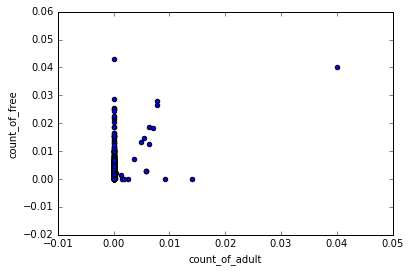

In [68]:
res_df.plot(kind='scatter', x='count_of_adult', y='count_of_free')

# Ways to go on
## Preprocessing
* Replace numbers + dates with special tokens
* Stem + Lemmatize

## Feature Functions
* "Automatically" find our keywords
* Look at parts of speech, and ratios of parts of speech
* Analyze Punctuation

## Classifiers
* Try other classifiers with other hyperparameters (linear, nearest neighbors, other Bayesian)
* Try data reduction/transformations (LDA/PCA)
* Cross Validation

## Visualizations
* Create visualizations of our data
  * word clouds
  * scatters/histographs of our important features

# Jumping the Gun

In [69]:
def predict(phrase):
    return clf.predict(make_feature_vector(phrase, feature_functions, lower_case))

In [70]:
!cat /Users/ben/Desktop/Talk/non_spam_test.txt

Hey Ben!  This is your friend.  We should see a movie tomorrow!



In [71]:
predict('/Users/ben/Desktop/Talk/non_spam_test.txt')

/Users/ben/anaconda/lib/python2.7/site-packages/sklearn/utils/validation.py:386: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and willraise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)


array([False], dtype=bool)

In [72]:
!cat /Users/ben/Desktop/Talk/spam_test.txt

ADULT ADULT ADULT

Buy Pills now.  They\'re only $500!


In [73]:
predict('/Users/ben/Desktop/Talk/spam_test.txt')

/Users/ben/anaconda/lib/python2.7/site-packages/sklearn/utils/validation.py:386: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and willraise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)


array([ True], dtype=bool)